# IE6400 Foundations Data Analytics Engineering

## Project 3: EEG Classification Model

### Group 17

#### DATA PREPROCESSING

In [3]:
# Import necessary libraries for data processing and visualization
import os
import pandas as pd
import numpy as np
from scipy import signal
import glob  

# Load and organize the EEG data
all_data = []
all_names = []
for folder in os.listdir(r'C:\Users\haris\Downloads\BonnEEGDataset'):
    for file in glob.glob(os.path.join(r'C:\Users\haris\Downloads\BonnEEGDataset', folder, '*.txt')):
        data = np.loadtxt(file)
        all_data.append(data)
        all_names.append(folder)
all_data=np.array(all_data)

In [4]:
# Display the shape of the dataset and the labels
all_data

array([[  34.,   33.,   28., ...,   39.,   41.,    7.],
       [  60.,   47.,   38., ...,  149.,  126.,   42.],
       [  26.,   16.,   13., ...,  114.,   99., -130.],
       ...,
       [ -51.,  -42.,  -39., ...,   -2.,    0.,  -49.],
       [  56.,   55.,   38., ...,  -32.,   -4.,   69.],
       [ -36.,  -71., -120., ...,    3.,  -13.,   30.]])

In [5]:
all_names

['F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N'

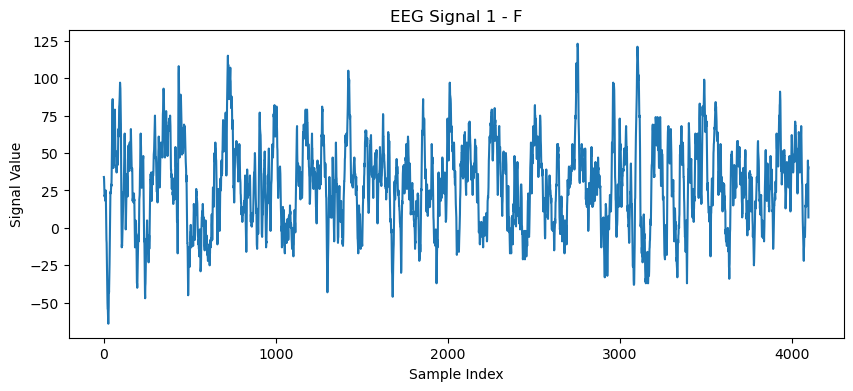

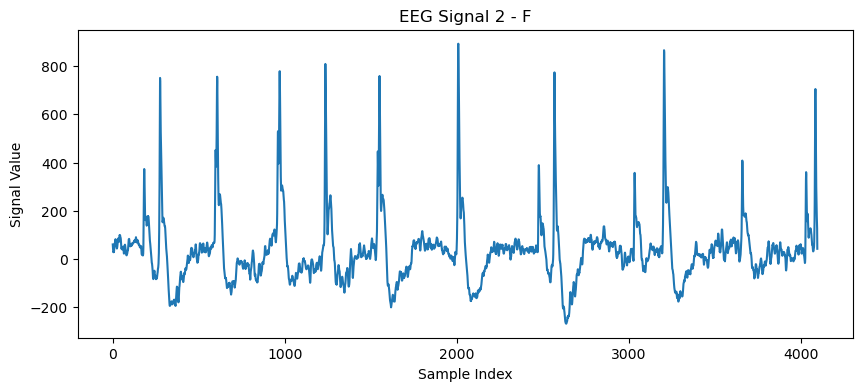

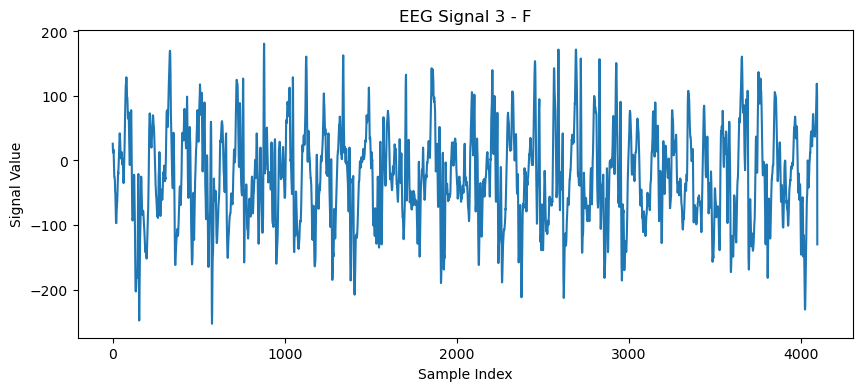

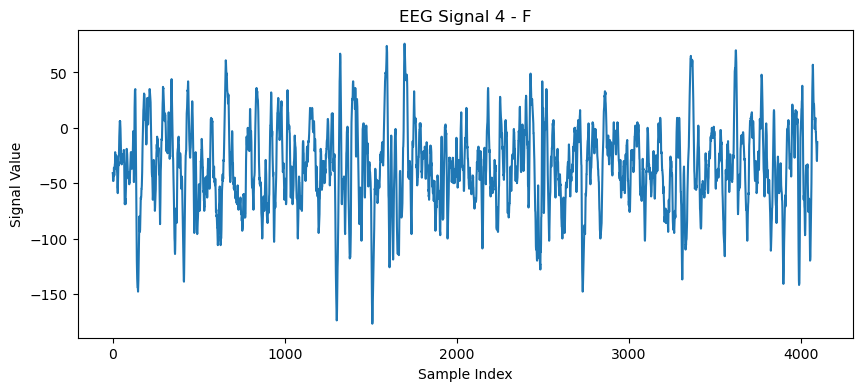

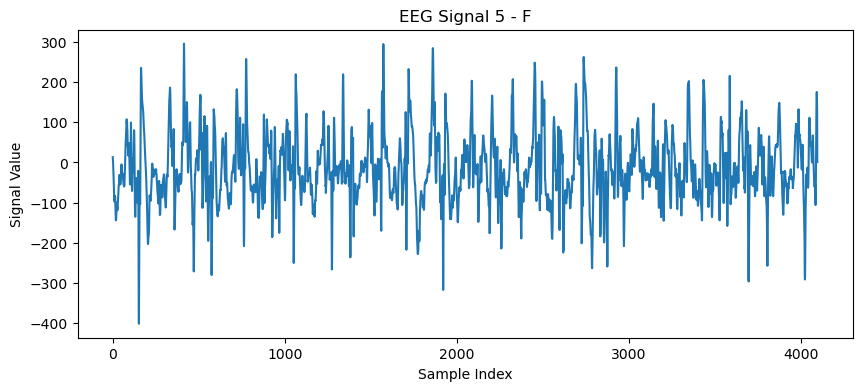

In [9]:
# Visualize the first few EEG signals
# Generate separate plots for a selected number of signals from the dataset
import matplotlib.pyplot as plt

# Define the number of signals to plot
num_signals_to_plot = 5

for i in range(min(num_signals_to_plot, all_data.shape[0])):
    plt.figure(figsize=(10, 4))
    plt.plot(all_data[i, :])
    plt.title(f'EEG Signal {i + 1} - {all_names[i]}')
    plt.xlabel('Sample Index')
    plt.ylabel('Signal Value')
    plt.show()

In [11]:
# Check for missing data points in the dataset
# Identifies if there are any NaN values in the EEG data
missing_values = np.isnan(all_data).sum()
print("Missing Values:\n", missing_values)

Missing Values:
 0


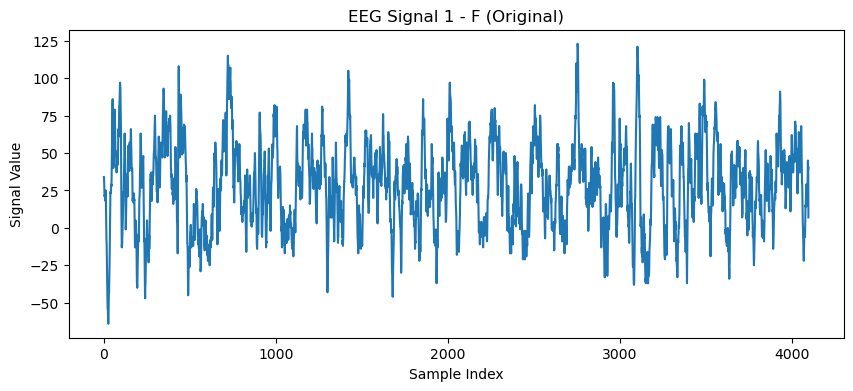

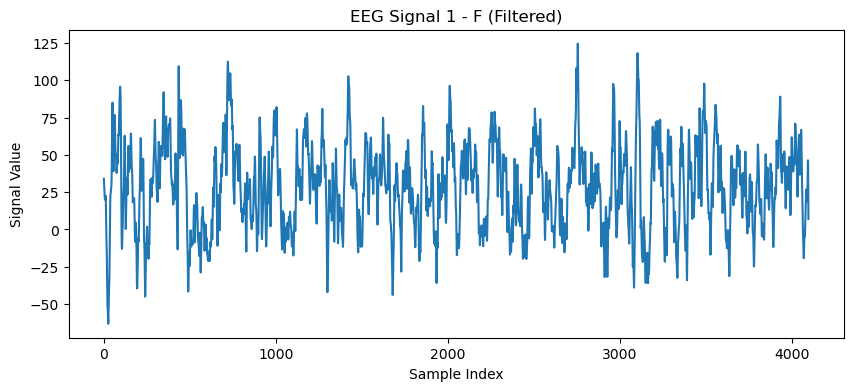

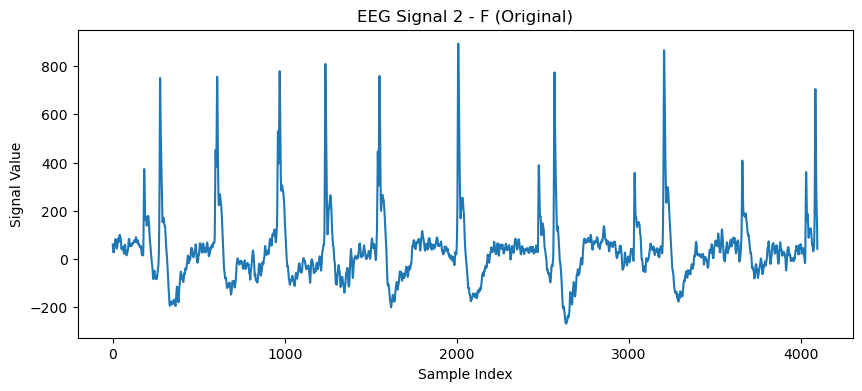

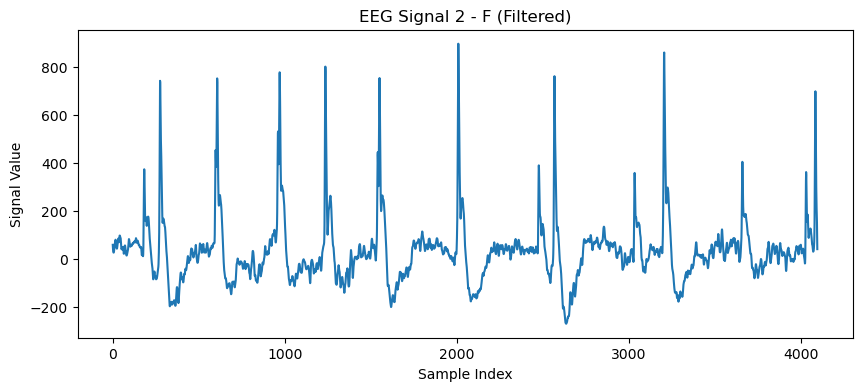

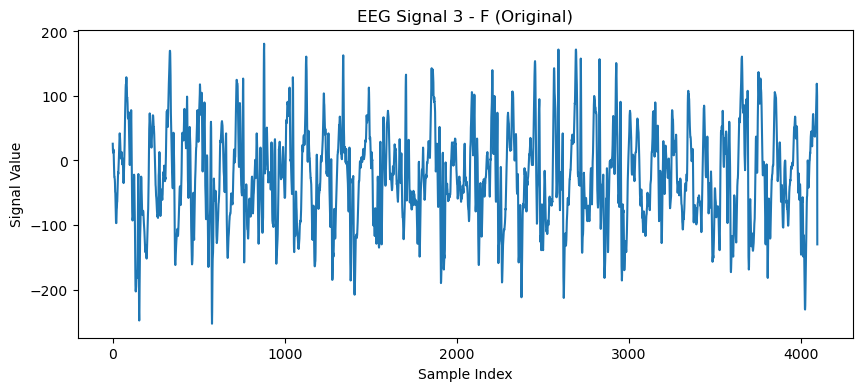

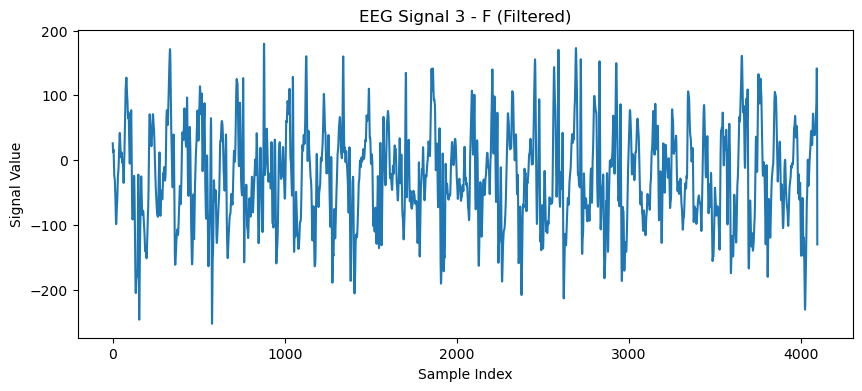

In [13]:
# Apply noise reduction to clean the EEG signals
# Use a low-pass Butterworth filter to eliminate unwanted high-frequency noise
fs = 250 
cutoff_freq = 50 
b, a = signal.butter(4, cutoff_freq / (fs / 2), 'low')

# Apply the filter to each EEG sample
all_data_filtered = signal.filtfilt(b, a, all_data)

# Visualize the original and filtered EEG signals
# Display the raw and cleaned signals for comparison
num_samples_to_plot = 3

for i in range(min(num_samples_to_plot, all_data.shape[0])):
    plt.figure(figsize=(10, 4))
    plt.plot(all_data[i, :])  # Plotting the original signal
    plt.title(f'EEG Signal {i + 1} - {all_names[i]} (Original)')
    plt.xlabel('Sample Index')
    plt.ylabel('Signal Value')
    plt.show()

    plt.figure(figsize=(10, 4))
    plt.plot(all_data_filtered[i, :])  # Plotting the filtered signal
    plt.title(f'EEG Signal {i + 1} - {all_names[i]} (Filtered)')
    plt.xlabel('Sample Index')
    plt.ylabel('Signal Value')
    plt.show()

Data shape: (500, 4097)
Summary statistics:
              0            1            2            3            4     \
count  500.000000   500.000000   500.000000   500.000000   500.000000   
mean    -3.718000    -9.802000   -16.094000   -18.820000   -16.662000   
std    145.274622   163.176469   188.246611   201.245888   188.973686   
min   -985.000000 -1221.000000 -1406.000000 -1395.000000 -1291.000000   
25%    -48.250000   -54.000000   -52.000000   -52.250000   -53.000000   
50%     -8.000000    -8.000000    -7.000000    -9.000000    -8.500000   
75%     36.000000    36.250000    37.250000    38.000000    41.000000   
max    800.000000   839.000000   857.000000   876.000000   893.000000   

             5           6            7            8            9     ...  \
count  500.000000  500.000000   500.000000   500.000000   500.000000  ...   
mean   -12.124000   -6.510000    -2.142000     1.882000     4.438000  ...   
std    165.080719  153.637922   155.370054   155.850617   155.8828

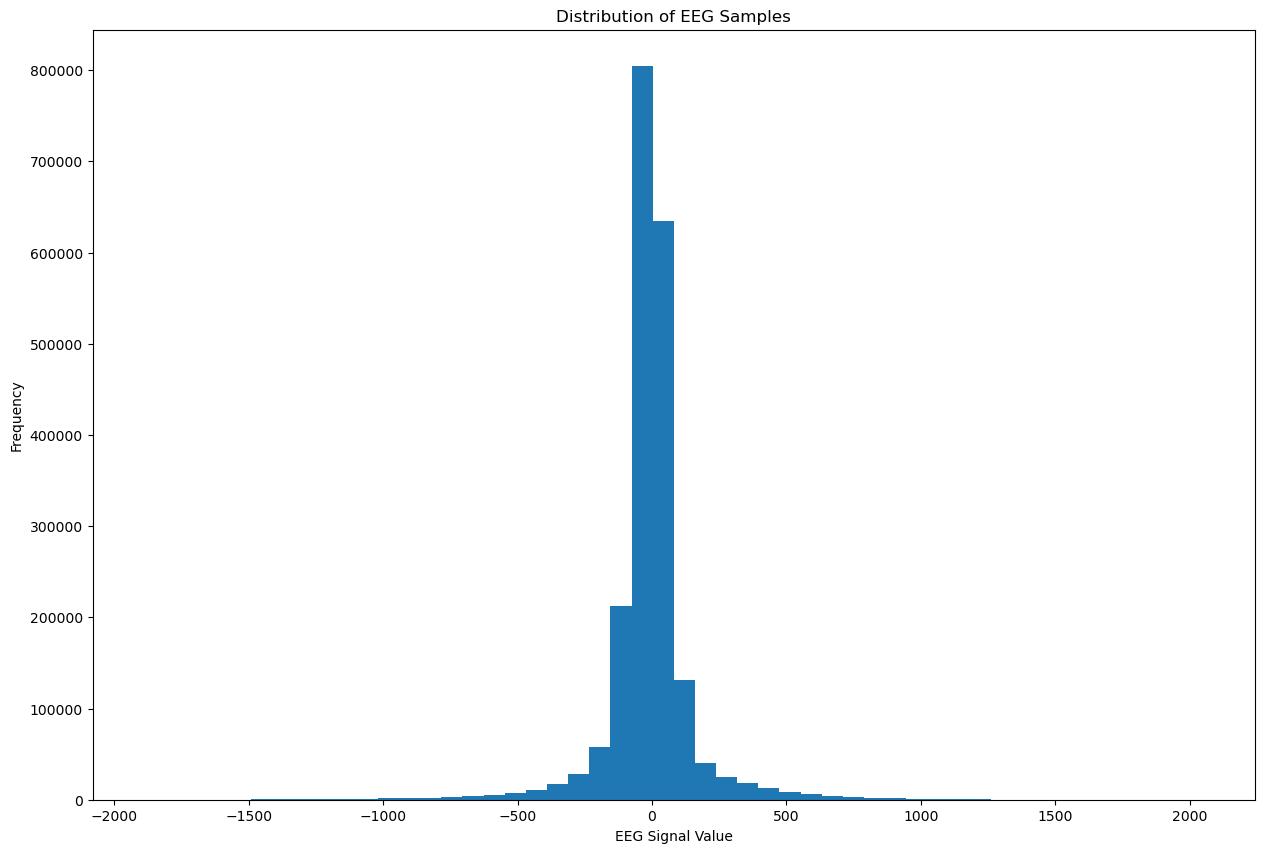

In [15]:
# Display basic dataset statistics
# Print the shape of the dataset and summary statistics
print("Data shape:", all_data.shape)

print("Summary statistics:\n", pd.DataFrame(all_data).describe())

# Check for missing values
missing_values = np.isnan(all_data).sum()
print("Missing Values:\n", missing_values)

# Visualize the distribution of EEG values
# Generate a histogram to show the frequency distribution of signal values
plt.figure(figsize=(15, 10))
plt.hist(all_data.flatten(), bins=50)
plt.title('Distribution of EEG Samples')
plt.xlabel('EEG Signal Value')
plt.ylabel('Frequency')
plt.show()

#### FEATURE EXTRACTION

In [18]:
# Extract meaningful features from the EEG signals
# Time-domain and frequency-domain features are calculated for each EEG signal
import numpy as np
from scipy.stats import skew, kurtosis
from scipy.signal import welch

def extract_time_domain_features(signal):
    mean_value = np.mean(signal)
    std_deviation = np.std(signal)
    skewness = skew(signal)
    kurt = kurtosis(signal)
    rms = np.sqrt(np.mean(np.square(signal)))
    return [mean_value, std_deviation, skewness, kurt, rms]

def extract_frequency_domain_features(signal, sampling_rate):
    freq, power_density = welch(signal, fs=sampling_rate, nperseg=256)
    max_power_freq = freq[np.argmax(power_density)]
    total_power = np.sum(power_density)
    normalized_power = power_density / total_power
    spectral_entropy = -np.sum(normalized_power * np.log2(normalized_power))    
    return [max_power_freq, spectral_entropy]

# Extract features for all EEG signals
sampling_rate = 250
for i in range(all_data.shape[0]):
    signal = all_data[i, :]   
    time_domain_features = extract_time_domain_features(signal)
    frequency_domain_features = extract_frequency_domain_features(signal, sampling_rate)
    all_features = time_domain_features + frequency_domain_features 
    print(f"Features for EEG Signal {i + 1}: {all_features}")

Features for EEG Signal 1: [28.570417378569687, 28.62507053383784, 0.0836471667718495, -0.18072031920125964, 40.443335820044176, 0.9765625, 3.7794442910807042]
Features for EEG Signal 2: [31.778374420307543, 133.47572179796714, 2.184076080531281, 8.93430826413078, 137.20653552322344, 0.9765625, 3.229613657849344]
Features for EEG Signal 3: [-25.015865267268733, 71.95809056217087, 0.04984613338982067, -0.25497430735385773, 76.18241471903949, 1.953125, 3.6064092973185655]
Features for EEG Signal 4: [-35.25213570905541, 37.80157249426841, -0.14066049530938735, 0.3333998165038823, 51.688218726215446, 1.953125, 3.8381435334165728]
Features for EEG Signal 5: [-15.550646814742494, 84.28527598177443, 0.3154616536319146, 0.9611821233312301, 85.70781973472866, 2.9296875, 4.361669283221834]
Features for EEG Signal 6: [-33.69123749084696, 22.86761048579896, -0.08668033643854081, 0.0735681382360096, 40.71887882782229, 7.8125, 3.892058465106019]
Features for EEG Signal 7: [-27.657310226995364, 38.71

#### DATA SPLITING

In [21]:
# Split the dataset for model training and evaluation
# Partition the dataset into training, validation, and test sets

from sklearn.model_selection import train_test_split

# Assuming labels are stored in all_names array
labels = np.array(all_names)
health_labels = np.isin(labels, ['Z', 'O'])
seizure_labels = np.isin(labels, ['N', 'F', 'S'])

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(all_data, health_labels, test_size=0.4, random_state=42, stratify=health_labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (300, 4097)
Validation set shape: (100, 4097)
Test set shape: (100, 4097)


#### MODEL SELECTION

In [24]:
# Train machine learning models
# Build and train CNN and LSTM models for EEG classification

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense
from sklearn.metrics import accuracy_score

# Reshaping data for compatibility with 1D CNN and LSTM
X_train_cnn = X_train[:, :, np.newaxis]
X_val_cnn = X_val[:, :, np.newaxis]
X_test_cnn = X_test[:, :, np.newaxis]

# CNN Model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compiling and training the CNN model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_val_cnn, y_val))

# Predicting on the test set
y_pred_cnn_probs = cnn_model.predict(X_test_cnn)
y_pred_cnn = (y_pred_cnn_probs > 0.5).astype(int)

# Evaluating the CNN model
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
print(f"Accuracy of CNN model: {accuracy_cnn}")

# Defining a simple LSTM model
lstm_model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], 1)),
    Dense(1, activation='sigmoid')
])

# Reshaping data for compatibility with LSTM
X_train_lstm = X_train[:, :, np.newaxis]
X_val_lstm = X_val[:, :, np.newaxis]
X_test_lstm = X_test[:, :, np.newaxis]

C:\Users\haris\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.5107 - loss: 382.4156 - val_accuracy: 0.6000 - val_loss: 78.2515
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.6078 - loss: 51.9171 - val_accuracy: 0.6000 - val_loss: 50.3125
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.6663 - loss: 26.6752 - val_accuracy: 0.6100 - val_loss: 35.2497
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.7418 - loss: 12.0076 - val_accuracy: 0.6600 - val_loss: 27.2301
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.9538 - loss: 0.4964 - val_accuracy: 0.6900 - val_loss: 22.9214
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.9735 - loss: 0.3123 - val_accuracy: 0.7000 - val_loss: 26.0943
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.9641 - loss: 0.6582 - val_accuracy: 0.7300 - val_loss: 19.0315
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9609 - loss: 0.5477 - val_accuracy

C:\Users\haris\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### MODEL TRAINING

In [27]:
# Compiling and train the LSTM model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_val_lstm, y_val))

# Predicting on the test set
y_pred_lstm_probs = lstm_model.predict(X_test_lstm)
y_pred_lstm = (y_pred_lstm_probs > 0.5).astype(int)

# Evaluating the LSTM model
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print(f"Accuracy of LSTM model: {accuracy_lstm}")

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5084 - loss: 0.7238 - val_accuracy: 0.6000 - val_loss: 0.6837
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6063 - loss: 0.6578 - val_accuracy: 0.6200 - val_loss: 0.6578
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6494 - loss: 0.6338 - val_accuracy: 0.5800 - val_loss: 0.6506
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6670 - loss: 0.6066 - val_accuracy: 0.6200 - val_loss: 0.6446
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6838 - loss: 0.5900 - val_accuracy: 0.6400 - val_loss: 0.6309
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7340 - loss: 0.5734 - val_accuracy: 0.6500 - val_loss: 0.6125
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7526 - loss: 0.5580 - val_accuracy: 0.7200 - val_loss: 0.5919
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7625 - loss: 0.5503 - val_accuracy: 0.7800 - val_loss:

In [29]:
from sklearn.metrics import classification_report
# Predicting on the test set using CNN model
y_pred_cnn_probs = cnn_model.predict(X_test_cnn)
y_pred_cnn = (y_pred_cnn_probs > 0.5).astype(int)

# Generating the classification report for CNN model
report_cnn = classification_report(y_test, y_pred_cnn)
print("Classification Report for CNN Model:")
print(report_cnn)

# Predicting on the test set using LSTM model
y_pred_lstm_probs = lstm_model.predict(X_test_lstm)
y_pred_lstm = (y_pred_lstm_probs > 0.5).astype(int)

# Generating the classification report for LSTM model
report_lstm = classification_report(y_test, y_pred_lstm)
print("Classification Report for LSTM Model:")
print(report_lstm)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Classification Report for CNN Model:
              precision    recall  f1-score   support

       False       0.78      0.87      0.82        60
        True       0.76      0.62      0.68        40

    accuracy                           0.77       100
   macro avg       0.77      0.75      0.75       100
weighted avg       0.77      0.77      0.77       100

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step
Classification Report for LSTM Model:
              precision    recall  f1-score   support

       False       0.81      0.90      0.85        60
        True       0.82      0.68      0.74        40

    accuracy                           0.81       100
   macro avg       0.81      0.79      0.80       100
weighted avg       0.81      0.81      0.81       100



#### MODEL EVALUATION

In [42]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Implement early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the LSTM model with early stopping
history = lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32,
                         validation_data=(X_val_lstm, y_val),
                         callbacks=[early_stopping])

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.8793 - loss: 0.3009 - val_accuracy: 0.8000 - val_loss: 0.4967
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.9038 - loss: 0.3062 - val_accuracy: 0.8100 - val_loss: 0.4938
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.8617 - loss: 0.3738 - val_accuracy: 0.8200 - val_loss: 0.4929
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.8928 - loss: 0.3344 - val_accuracy: 0.8100 - val_loss: 0.4929
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.8758 - loss: 0.3349 - val_accuracy: 0.8200 - val_loss: 0.4873
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.8938 - loss: 0.3154 - val_accuracy: 0.8200 - val_loss: 0.4838
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.8784 - loss: 0.3276 - val_accuracy: 0.8100 - val_loss: 0.4891
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.8571 - loss: 0.3610 - val_accuracy: 0.8100 - val_loss:

#### TESTING

In [44]:
# Predict on the validation set
y_pred_lstm_probs = lstm_model.predict(X_val_lstm)
y_pred_lstm = (y_pred_lstm_probs > 0.5).astype(int)

# Evaluate the LSTM model on the validation set
accuracy_lstm = accuracy_score(y_val, y_pred_lstm)
precision_lstm = precision_score(y_val, y_pred_lstm)
recall_lstm = recall_score(y_val, y_pred_lstm)
f1_lstm = f1_score(y_val, y_pred_lstm)

print(f"Validation Accuracy of LSTM model: {accuracy_lstm}")
print(f"Validation Precision of LSTM model: {precision_lstm:.2f}")
print(f"Validation Recall of LSTM model: {recall_lstm}")
print(f"Validation F1 Score of LSTM model: {f1_lstm:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step
Validation Accuracy of LSTM model: 0.81
Validation Precision of LSTM model: 0.80
Validation Recall of LSTM model: 0.7
Validation F1 Score of LSTM model: 0.75


#### Results and Visualization

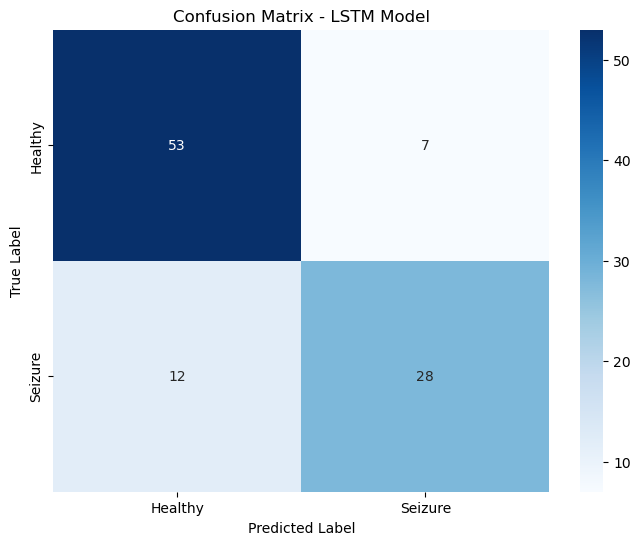

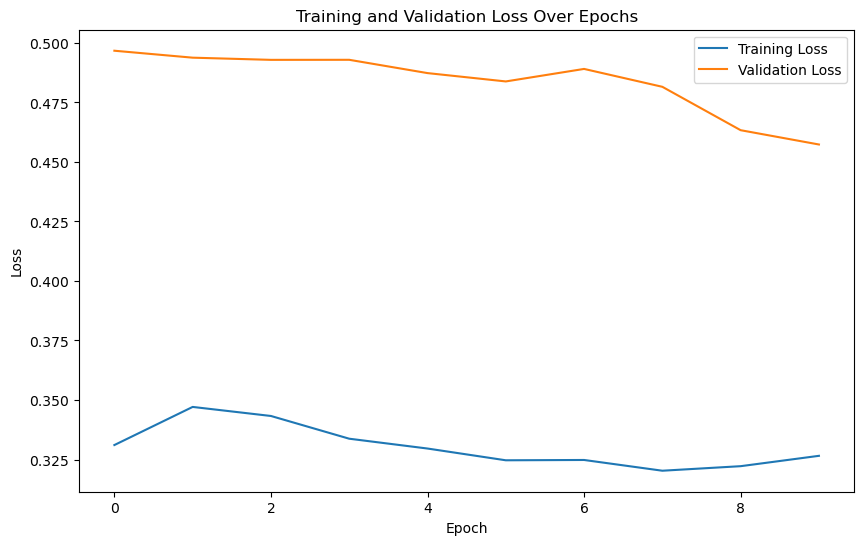

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
conf_mat_lstm = confusion_matrix(y_val, y_pred_lstm)
sns.heatmap(conf_mat_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Seizure'], yticklabels=['Healthy', 'Seizure'])
plt.title('Confusion Matrix - LSTM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualize the training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()